## 1- Análisis de los Datos

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
filename = 'UCI_Credit_Card.csv'

In [92]:
data = pd.read_csv(filename, index_col=0)

In [93]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

No fue necesario pasos de limpieza. Los datos se cargaron en un marco de datos de Pandas directamente desde el archivo CSV.

## 2- Verificando si hay datos perdidos

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

#### Verificando si hay valores nulos

In [95]:
data.isnull().sum().sum()

0

#### * Como no hay valores NULL en ninguna de las columnas, no es necesario tratar con valores faltantes

## 3-  Busqueda de valores atípicos.

In [96]:
pd.options.display.float_format = '{:,}'.format

In [97]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,"30,000.0","167,484.32266666667","129,747.66156720239","10,000.0","50,000.0","140,000.0","240,000.0","1,000,000.0"
SEX,"30,000.0",1.6037333333333332,0.48912919609026045,1.0,1.0,2.0,2.0,2.0
EDUCATION,"30,000.0",1.8531333333333333,0.7903486597207291,0.0,1.0,2.0,2.0,6.0
MARRIAGE,"30,000.0",1.5518666666666667,0.5219696006132486,0.0,1.0,2.0,2.0,3.0
AGE,"30,000.0",35.4855,9.217904068090188,21.0,28.0,34.0,41.0,79.0
PAY_0,"30,000.0",-0.0167,1.1238015279973348,-2.0,-1.0,0.0,0.0,8.0
PAY_2,"30,000.0",-0.13376666666666667,1.1971859730345533,-2.0,-1.0,0.0,0.0,8.0
PAY_3,"30,000.0",-0.1662,1.1968675684465735,-2.0,-1.0,0.0,0.0,8.0
PAY_4,"30,000.0",-0.22066666666666668,1.1691386224023375,-2.0,-1.0,0.0,0.0,8.0
PAY_5,"30,000.0",-0.2662,1.1331874060027483,-2.0,-1.0,0.0,0.0,8.0


### Visualización por atributos

### Sexo

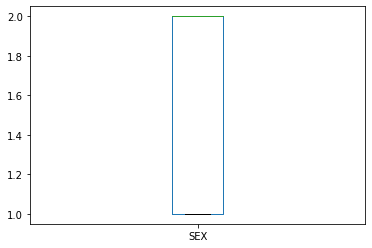

In [98]:
data[['SEX']].plot(kind='box')

#### No hay valores atípicos para Sexo porque los valores en este conjunto de datos solo toman 2 valores

### Educación

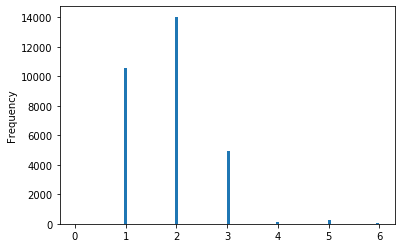

In [99]:
data['EDUCATION'].plot(kind='hist', bins=100)

##### Los valores para la educación son 
1 =(Posgrado), 
2=(Universidad),
3 (Secundaria), 
valores 4, 5 y 6 que representan (otros) y (desconocidos). 

Estos últimos son valores atípicos pero no inesperados. Curiosamente tambien hay valores en 0 para Educación, los cuales no deberían de estar.

### Casados

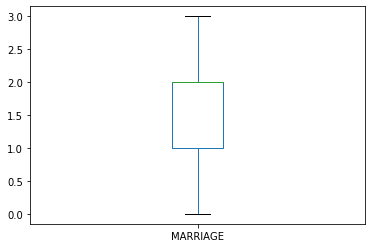

In [100]:
data[['MARRIAGE']].plot(kind='box')

In [101]:
data['MARRIAGE'].describe()

count             30,000.0
mean    1.5518666666666667
std     0.5219696006132486
min                    0.0
25%                    1.0
50%                    2.0
75%                    2.0
max                    3.0
Name: MARRIAGE, dtype: float64

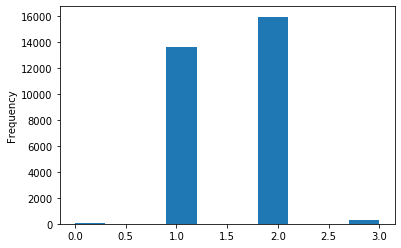

In [102]:
data['MARRIAGE'].plot(kind='hist')

In [103]:
data[data['MARRIAGE'] == 0].shape

(54, 24)

Para el atributo casados, la gran mayoría de los valores son 1=(casados) y 2=(solteros) como se esperaría. Sin embargo hay algunos valores que son iguales a 3=("Otros"), sin embargo curiosamente hay algunos valores (54 para ser exactos) que son iguales a 0, lo que no debería ser posible.

### Observación de Limit_BAL 

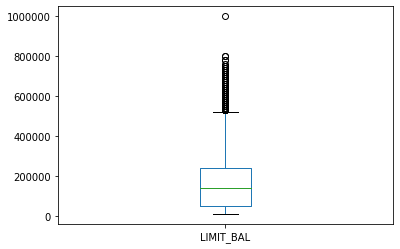

In [104]:
data['LIMIT_BAL'].plot(kind='box')

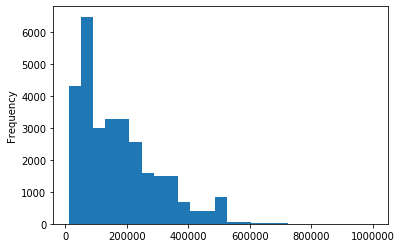

In [105]:
data['LIMIT_BAL'].plot(kind='hist', bins=25)

In [106]:
data['LIMIT_BAL'].describe()

count              30,000.0
mean    167,484.32266666667
std     129,747.66156720239
min                10,000.0
25%                50,000.0
50%               140,000.0
75%               240,000.0
max             1,000,000.0
Name: LIMIT_BAL, dtype: float64

In [107]:
data['LIMIT_BAL'].max()

1000000.0

In [108]:
data[data['LIMIT_BAL'] < 200000].shape

(18850, 24)

In [109]:
data.shape

(30000, 24)

La mayoría de los valores (18850) se agrupan por debajo de 200,000 de crédito dado. Algunos valores atípicos aparecen por encima del valor máximo no atípico de 525,000 cuando estamos utilizando la definición de un valor atípico que es cualquier valor

a) mayor que el valor Q3 + 1.5 * (el rango intercuartil) y
b) cualquier valor menor que Q1 - 1.5 * (el rango intercuartil)

Estos valores tienen mucho sentido, por lo que no es necesario deshacerse de ellos.

### Edad

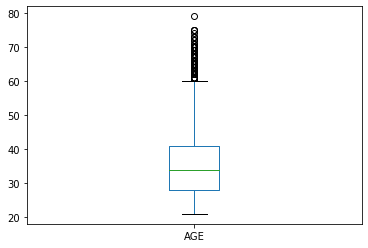

In [110]:
data['AGE'].plot(kind='box')

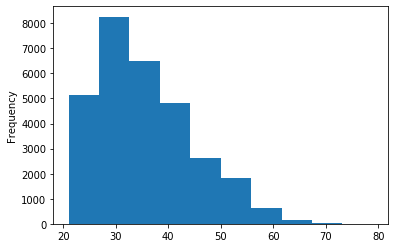

In [111]:
data['AGE'].plot(kind='hist', bins=10)

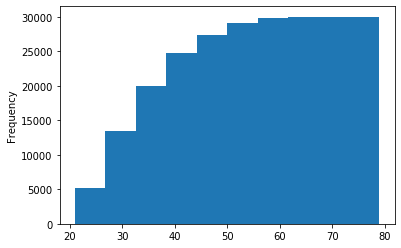

In [112]:
data['AGE'].plot(kind='hist', bins=10, cumulative=True)

In [113]:
data['AGE'].describe()

count            30,000.0
mean              35.4855
std     9.217904068090188
min                  21.0
25%                  28.0
50%                  34.0
75%                  41.0
max                  79.0
Name: AGE, dtype: float64

In [114]:
data[data['AGE'] >= 60.5].shape

(272, 24)

In [115]:
272/30000

0.009066666666666667

Vemos que la mayoría (75% en este caso) de los valores caen entre 21 años y 41 años. Casi el 1% de los valores en este conjunto de datos se pueden clasificar como valores atípicos, ya que tienen edades superiores a 60,5 años. Sin embargo, estas edades mayores puden que tengan sentido y no considero que requieran ningún manejo especial.

### Columnas con estado de reembolso

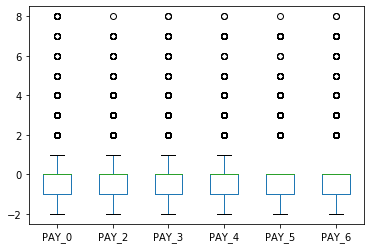

In [116]:
data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].plot(kind='box')

In [117]:
data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,"30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0"
mean,-0.0167,-0.13376666666666667,-0.1662,-0.22066666666666668,-0.2662,-0.2911
std,1.1238015279973348,1.1971859730345533,1.1968675684465735,1.1691386224023375,1.1331874060027483,1.1499876256079027
min,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,8.0,8.0,8.0,8.0,8.0,8.0


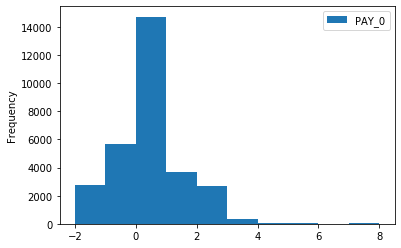

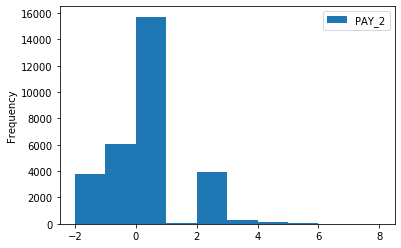

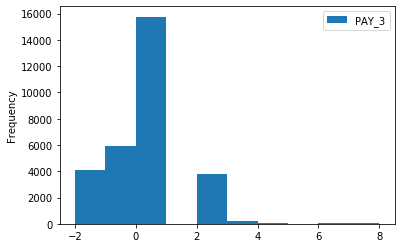

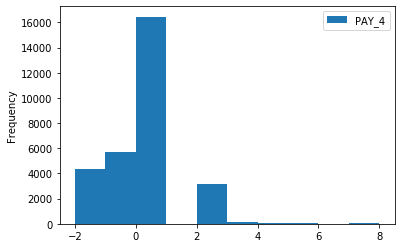

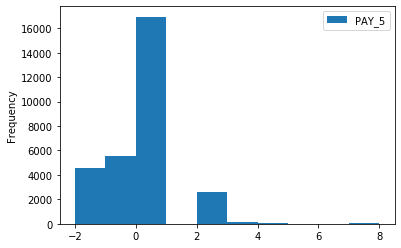

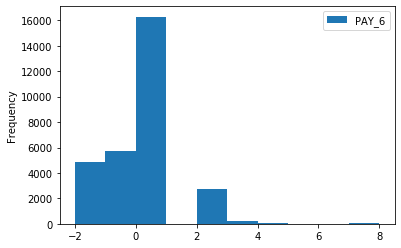

In [118]:
data[['PAY_0']].plot(kind='hist')
data[['PAY_2']].plot(kind='hist')
data[['PAY_3']].plot(kind='hist')
data[['PAY_4']].plot(kind='hist')
data[['PAY_5']].plot(kind='hist')
data[['PAY_6']].plot(kind='hist')

Lo curioso en estas observaciones es que la mayoría de los valores para cada columna son 0 o -2, que no deberían ser valores admitidos, de acuerdo con las descripciones del conjunto de datos. Aparte de eso considero que, todos los demás valores son compatibles, aunque parece que los valores se desplazan hacia abajo por 1 ya que el máximo es 9 y la descripción del conjunto de datos dice que debería ser 8. Todos los valores mayores o iguales a 2 se consideran valores atípicos y ya que El 10% de las filas tienen valores mayores o iguales a 2, aproximadamente el 10% del conjunto de datos se considera atípico. Sin embargo, estos valores tienen sentido y creo que deben mantenerse.

### Estados de cuenta

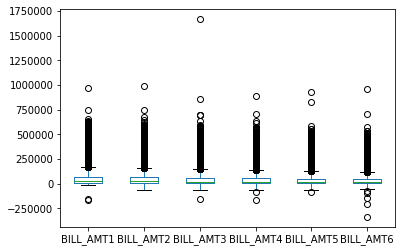

In [119]:
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box')

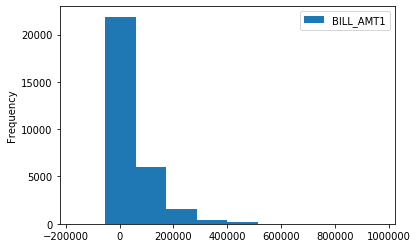

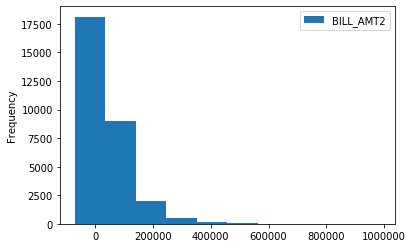

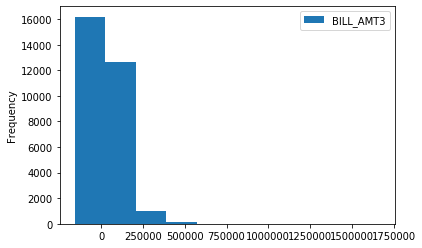

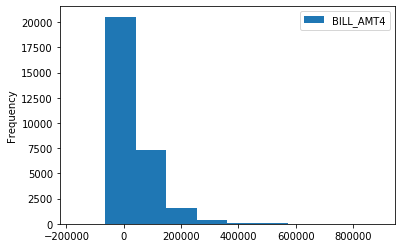

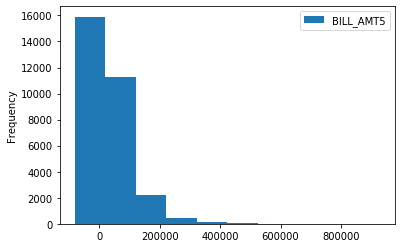

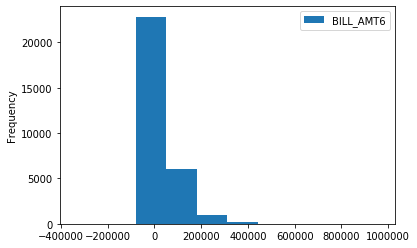

In [120]:
for i in range (1,7):
    data[['BILL_AMT' + str(i)]].plot(kind='hist')

In [121]:
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,"30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0"
mean,"51,223.3309","49,179.07516666667","47,013.1548","43,262.94896666666","40,311.40096666667","38,871.7604"
std,"73,635.86057552956","71,173.76878252835","69,349.38742703684","64,332.85613391631","60,797.15577026487","59,554.10753674573"
min,"-165,580.0","-69,777.0","-157,264.0","-170,000.0","-81,334.0","-339,603.0"
25%,"3,558.75","2,984.75","2,666.25","2,326.75","1,763.0","1,256.0"
50%,"22,381.5","21,200.0","20,088.5","19,052.0","18,104.5","17,071.0"
75%,"67,091.0","64,006.25","60,164.75","54,506.0","50,190.5","49,198.25"
max,"964,511.0","983,931.0","1,664,089.0","891,586.0","927,171.0","961,664.0"


In [122]:
def dictionary(name):
    d = {}
    for i in range(1,7):
        q3 = data[name + str(i)].quantile(0.75)
        q1 = data[name + str(i)].quantile(0.25)
        u = q3 + 1.5*(q3-q1)
        l = q1 - 1.5*(q3-q1)
        #print(len(data[(data[name + str(i)] > u) | (data[name + str(i)] < l)]))
        d[name + "_outliers{0}".format(i)] = (len(data[(data[name + str(i)] > u) | (data[name + str(i)] < l)]))/30000
    return d

In [123]:
BILL_AMT_dict = dictionary('BILL_AMT')

In [124]:
BILL_AMT_dict

{'BILL_AMT_outliers1': 0.08,
 'BILL_AMT_outliers2': 0.07983333333333334,
 'BILL_AMT_outliers3': 0.0823,
 'BILL_AMT_outliers4': 0.0874,
 'BILL_AMT_outliers5': 0.09083333333333334,
 'BILL_AMT_outliers6': 0.08976666666666666}

Para los Bill Amounts, tenemos más "valores atípicos" de lo normal, con un rango de 7.9% a 9.1% de las filas consideradas atípicas. Estas filas ciertamente deben permanecer en nuestro conjunto de datos, ya que son muy relevantes para la tarea de predecir el incumplimiento de la tarjeta de crédito.

### Cantidad de pago previo

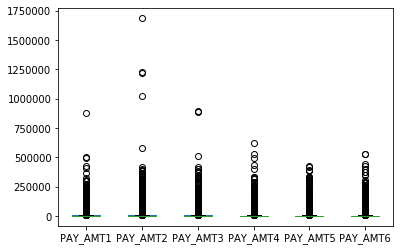

In [125]:
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].plot(kind='box')

In [126]:
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,"30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0"
mean,"5,663.5805","5,921.1635","5,225.6815","4,826.076866666666","4,799.387633333334","5,215.502566666667"
std,"16,563.280354025766","23,040.87040205724","17,606.961469803104","15,666.159744032007","15,278.305679144789","17,777.4657754353"
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,"1,000.0",833.0,390.0,296.0,252.5,117.75
50%,"2,100.0","2,009.0","1,800.0","1,500.0","1,500.0","1,500.0"
75%,"5,006.0","5,000.0","4,505.0","4,013.25","4,031.5","4,000.0"
max,"873,552.0","1,684,259.0","896,040.0","621,000.0","426,529.0","528,666.0"


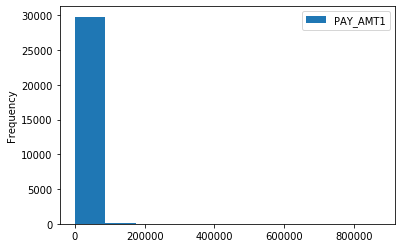

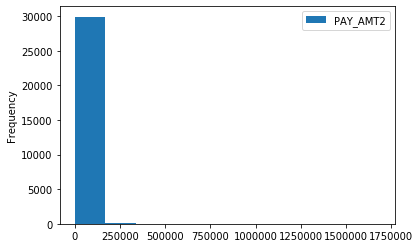

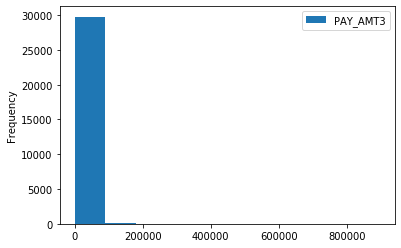

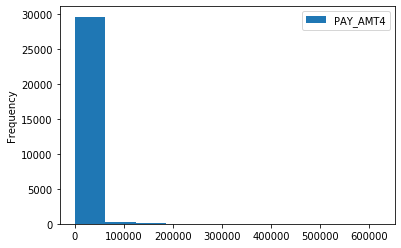

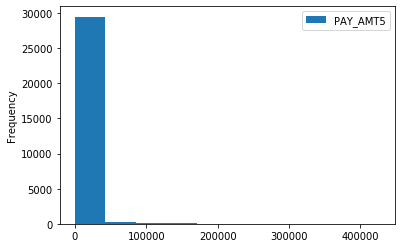

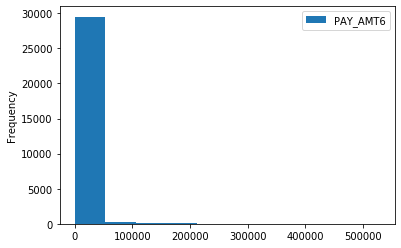

In [127]:
for i in range (1,7):
    data[['PAY_AMT' + str(i)]].plot(kind='hist')

In [128]:
PAY_AMT_dict = dictionary('PAY_AMT')

In [129]:
PAY_AMT_dict

{'PAY_AMT_outliers1': 0.0915,
 'PAY_AMT_outliers2': 0.09046666666666667,
 'PAY_AMT_outliers3': 0.0866,
 'PAY_AMT_outliers4': 0.0998,
 'PAY_AMT_outliers5': 0.09816666666666667,
 'PAY_AMT_outliers6': 0.0986}

Podemos ver aquí que entre el 8,6% y el 10% de los pagos anteriores son valores atípicos estadísticos. Al igual que antes, estos números son técnicamente atípicos, aunque ciertamente deberían incluirse en el análisis porque
a) no hay indicación de que los datos se hayan ingresado correctamente
b) los valores atípicos afectan tanto los resultados como los supuestos y, por lo tanto, son relevantes
c) se supone que los valores atípicos no están creando una asociación que no existía anteriormente (aunque esto aún no se ha examinado)

### Default Payment

In [130]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [131]:
data['default.payment.next.month'].unique()

array([1, 0], dtype=int64)

Solo posee 2 valores (Si y No)